In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

**(01)**

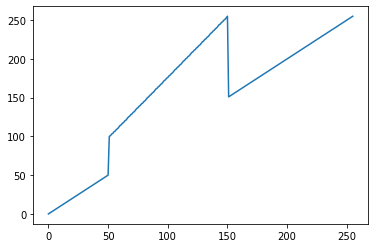

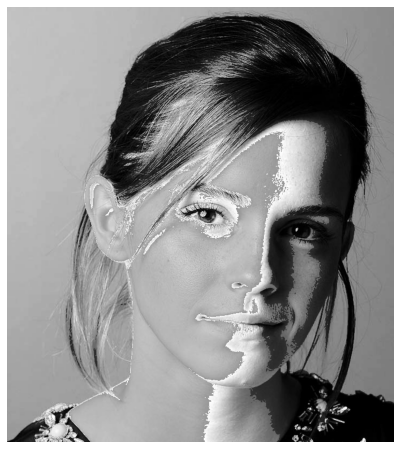

In [21]:
f = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(51,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(255,150,0)
t5 = np.linspace(151,255,105)

t = np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)
fig, ax = plt.subplots()
ax.plot(t)

g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('off')
ax.imshow(img)
plt.show()

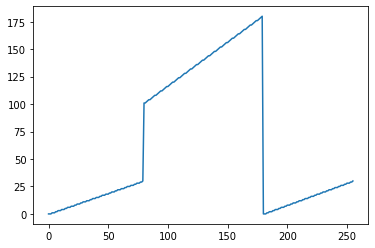

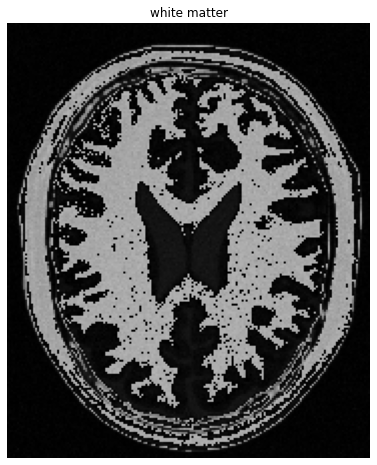

In [33]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,30,80)
t2 = np.linspace(31,100,0)
t3 = np.linspace(101,180,100)
t4 = np.linspace(0,30,76)

t = np.concatenate((t1,t2,t3,t4), axis=0).astype(np.uint8)
fig, ax = plt.subplots()
ax.plot(t)
g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('off')
ax.set_title('white matter')
ax.imshow(img)
plt.show()

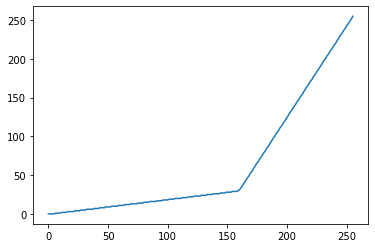

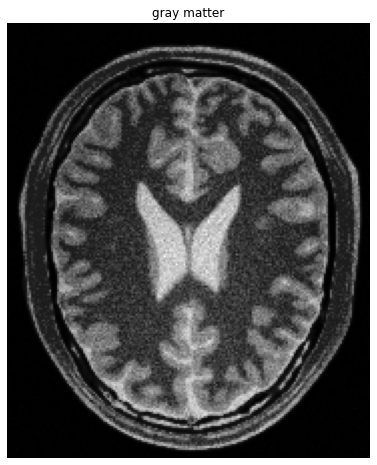

In [44]:
f = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,30,160)
t2 = np.linspace(31,255,96)

t = np.concatenate((t1,t2), axis=0).astype(np.uint8)
fig, ax = plt.subplots()
ax.plot(t)
g = cv.LUT(f, t)

img = cv.cvtColor(g, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(8,8))
plt.axis('off')
ax.set_title('gray matter')
ax.imshow(img)
plt.show()

Text(0.5, 1.0, 'Gamma corrected')

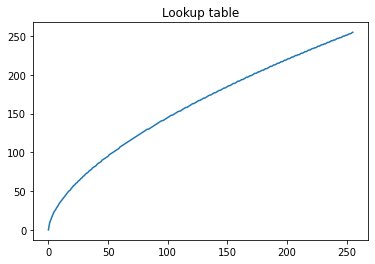

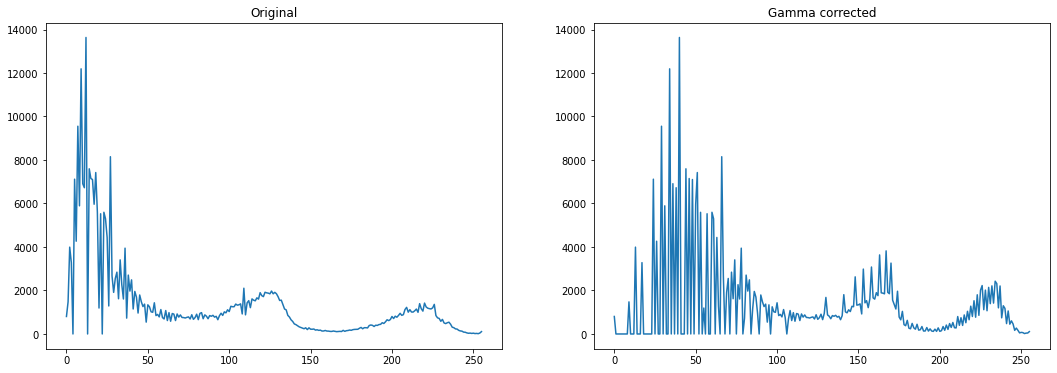

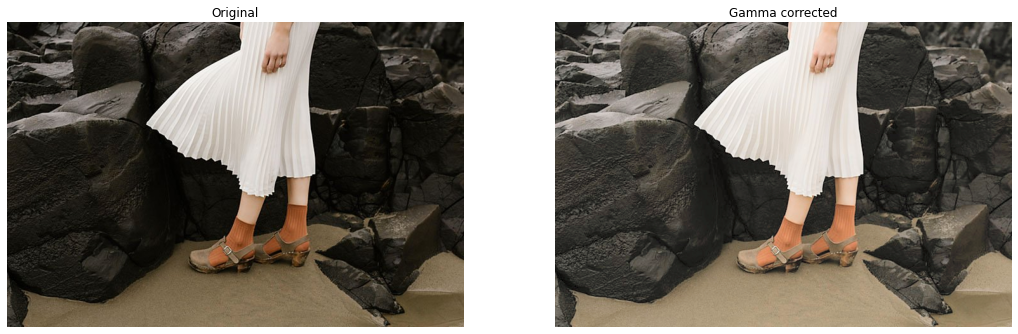

In [60]:
#for gamma = 0.6
f = cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert f is not None

orig = cv.cvtColor(f,cv.COLOR_BGR2RGB)
lab = cv.cvtColor(f,cv.COLOR_BGR2Lab)
L, a, b = cv.split(lab)
gamma = 0.6
t = np.array([(p/255.0)**(gamma)*255.0 for p in range (0,256)]).astype('uint8')

fig, ax = plt.subplots()
ax.plot(t)
ax.set_title('Lookup table')

g = cv.LUT(L, t)
lab_orig = cv.cvtColor(f,cv.COLOR_BGR2Lab)
lab[:,:,0] = g

img = cv.cvtColor(lab, cv.COLOR_Lab2RGB).astype('uint8')
hist_orig = cv.calcHist([lab_orig],[0],None,[256],[0,256])
hist_gamma = cv.calcHist([lab],[0],None,[256],[0,256])

fig, axarr = plt.subplots(1,2, figsize =(18,6))
axarr[1].plot(hist_gamma)
axarr[0].plot(hist_orig)
axarr[0].set_title('Original')
axarr[1].set_title('Gamma corrected')
    
fig, axarr2 = plt.subplots(1,2, figsize = (18,6))
axarr2[0].imshow(orig)
axarr2[0].axis('off')
axarr2[1].imshow(img)
axarr2[1].axis('off')
axarr2[0].set_title('Original')
axarr2[1].set_title('Gamma corrected')

(-0.5, 499.5, 499.5, -0.5)

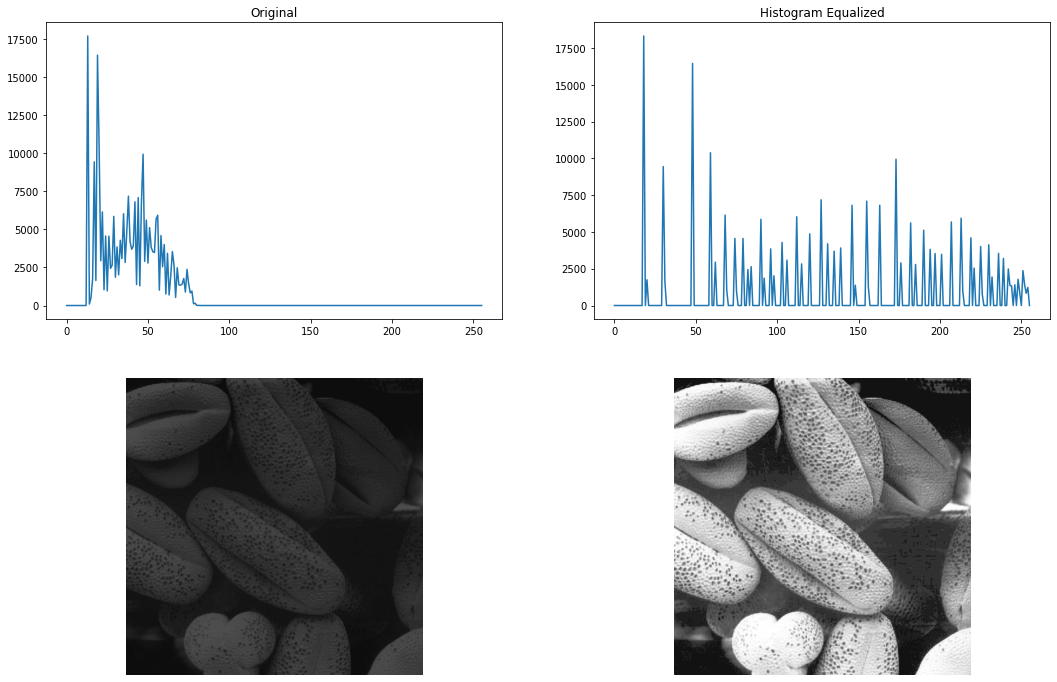

In [78]:
def Calc_hist(im):
    count = np.zeros(256)
    for i in range (im.shape[1]):
        for j in range(im.shape[0]):
            count[im[i][j]] += 1.
    return(count)

def Cumulative_sum(arr):
    cdf = arr[:]
    for i in range(len(cdf)):
        if i==0:
            continue
        else:
            cdf[i] += cdf[i-1] 
    return cdf

def equalize(f):
    
f = cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None
height,width = f.shape
hist = Calc_hist(f)

fig, ax = plt.subplots(2,2, figsize=(18,12))
ax[0,0].plot(hist)
ax[0,0].set_title('Original')

cdf = Cumulative_sum(hist)
normalized = cdf*255/(height*width)

g = cv.LUT(f,normalized).astype('uint8')
eq_hist = Calc_hist(g)

ax[0,1].plot(eq_hist)
ax[0,1].set_title('Histogram Equalized')
ax[1,0].imshow(f, cmap='gray',vmin=0,vmax=255)
ax[1,0].axis('off')
ax[1,1].imshow(g, cmap='gray',vmin=0,vmax=255)
ax[1,1].axis('off')